<div align="center" style="font-family: 'Consolas', monospace;"><h1> Model Evaluation For Car Price Predictor </h1> </div>

<p align = "center" style="font-family: 'Consolas', monospace;"> The purpose of this notebook is to evaluate and compare model performance for the best model trained in model training notebook</p>

<br><ul> <li style="font-family: 'Consolas', monospace;">Load model and import libraries</li></ul>

In [66]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = joblib.load('models/model.pkl')
df = pd.read_csv('data/Cleaned_Train_Set.csv') # Test Data

# Features & target
X = df.drop(columns=["price"])
y = df["price"]

y_pred = model.predict(X) # Predictions

<ul> <li style="font-family: 'Consolas', monospace;">Evaluate Model</li></ul>

In [67]:
def evaluate_model(y_true, y_pred):
    print("Model Evaluation Metrics:")
    print(f"MAE  (Mean Absolute Error): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE  (Mean Squared Error): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate_model(y, y_pred)

Model Evaluation Metrics:
MAE  (Mean Absolute Error): 0.1492
MSE  (Mean Squared Error): 0.0385
RMSE (Root Mean Squared Error): 0.1962
R² Score: 0.8447


<ul> <li style="font-family: 'Consolas', monospace;">Plot Prediction v Actual Value</li></ul>

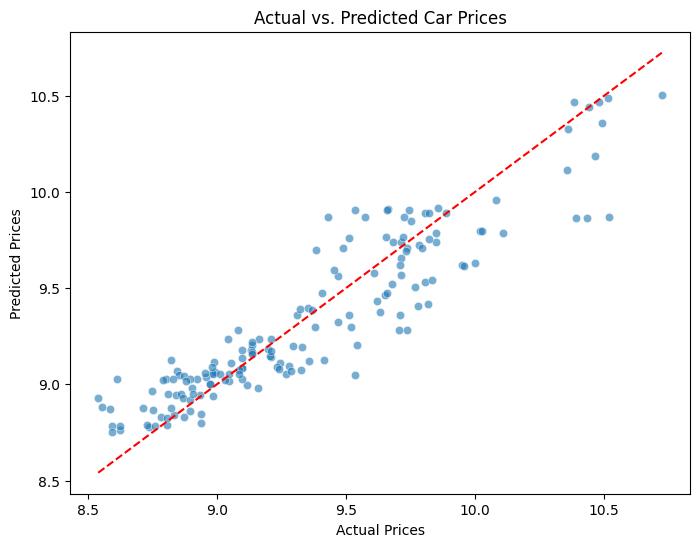

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red")  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices")
plt.show()

<ul> <li style="font-family: 'Consolas', monospace;">Residual Plot</li></ul>

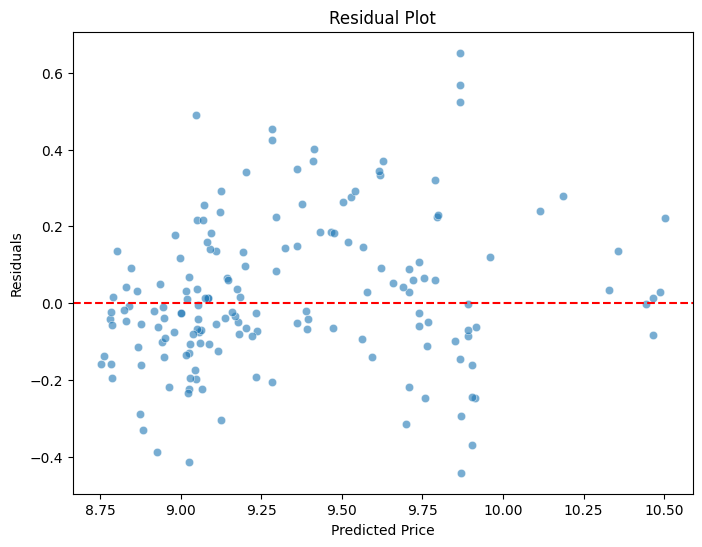

In [69]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

<ul> <li style="font-family: 'Consolas', monospace;">Learning Curves</li></ul>

C:\Users\ARNAV\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (140) is greater than the total number of samples (13). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ARNAV\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (140) is greater than the total number of samples (42). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ARNAV\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (140) is greater than the total number of samples (72). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ARNAV\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (140) is greater than the total number of samples (101). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ARNAV\AppData\Roaming\Python\Python312\site-packages\sklearn\preproces

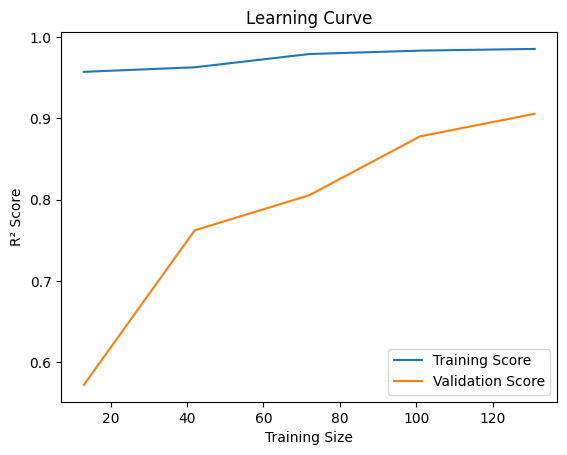

In [70]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

<ul> <li style="font-family: 'Consolas', monospace;">Save Evaluation</li></ul>

In [71]:
results = {
    "MAE": mean_absolute_error(y, y_pred),
    "MSE": mean_squared_error(y, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y, y_pred)),
    "R2 Score": r2_score(y, y_pred)
}

results_df = pd.DataFrame([results])
results_df.to_csv("data/model_evaluation_results.csv", index=False)
print("Evaluation results saved!")

Evaluation results saved!
